In [149]:
import numpy as np
from numpy import ndarray
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [150]:
class Layer:
    def __init__(self):
        pass

    def forward(self, inp: ndarray):
        pass

    def backward(self, inp: ndarray):
        pass

In [151]:
class Loss:
    def __init__(self):
        pass

    def __call__(self, y_hat: ndarray, y: ndarray):
        pass

    def der(self, y: float, y_hat: float, N: int):
        pass

In [152]:
class CrossEntropyLoss(Loss):
    def __init__(self):
        pass

    def __call__(self, y_hat: ndarray, y: ndarray) -> float:
        return -1/len(y)*np.sum(y*np.log(y_hat+1e-20))

    def der(self, y: ndarray, y_hat: ndarray, N: int) -> ndarray:
        return -1/N*y/(y_hat+1e-20)

In [153]:
class ReLU(Layer):
    def __init__(self):
        pass

    def forward(self, inp: ndarray) -> ndarray:
        return np.where(inp > 0, inp, 0)

    def backward(self, inp: ndarray) -> ndarray:
        return np.where(inp > 0, 1, 0)

In [154]:
class Sigmoid(Layer):
    def __init__(self):
        pass

    def forward(self, inp: ndarray) -> ndarray:
        return 1/(1+np.exp(-inp))

    def backward(self, inp: ndarray) -> ndarray:
        return self.forward(inp)*(1-self.forward(inp))

In [155]:
class Dense(Layer):
    def __init__(self, inp_units: int, outp_units: int, learning_rate: float = 0.1):
        self.w = np.random.normal(size=(inp_units, outp_units))
        self.b = np.zeros(outp_units)
        self.lr = learning_rate

    def forward(self, inp: ndarray) -> ndarray:
        return np.dot(inp, self.w) + self.b

    def backward(self, inp: ndarray) -> ndarray:
        pass

In [156]:
class MLP:
    def __init__(self):
        self.layers = []

    # adds a dense layer with the input and output shapes
    def _add_dense(self, out_shape: int, inp_shape: int):
        if inp_shape:
            self.layers.append(Dense(inp_shape, out_shape))
        elif self.layers:
            self.layers.append(Dense(len(self.layers[-2].b), out_shape))
        else:
            raise AttributeError('No input shape!')

    # adds an activation layer
    def _add_activation(self, activation: str):
        if activation.lower() == 'sigmoid':
            self.layers.append(Sigmoid())
        elif activation.lower() == 'relu':
            self.layers.append(ReLU())
        else:
            raise AttributeError('No activation!')

    # combination of two methods above
    def add_layer(self, out_shape: int, inp_shape: int = None, activation: str = 'sigmoid'):
        self._add_dense(out_shape, inp_shape)
        self._add_activation(activation)

    # performs forward pass
    def forward(self, X: ndarray) -> ndarray:
        outputs = [X]

        for layer in self.layers:
            X = layer.forward(X)
            outputs.append(X)

        return np.array(outputs)

    # predicts classes
    def predict(self, X: ndarray) -> ndarray:
        return np.argmax(self.forward(X)[-1], axis=1)

    # backpropagation cycle
    def backward(self, preds: ndarray, criterion: Loss):
        grad = []
        for n, layer in enumerate(self.layers):
            layer.backward(preds[n])

    # training method
    def fit(self, X: ndarray, y: ndarray, criterion: Loss) -> ndarray:
        preds = self.forward(X)
        loss = criterion(preds, y)

        return loss
        

In [157]:
X, y = make_blobs(n_samples=300, centers=3)

onehot = OneHotEncoder(sparse=False)
y = onehot.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

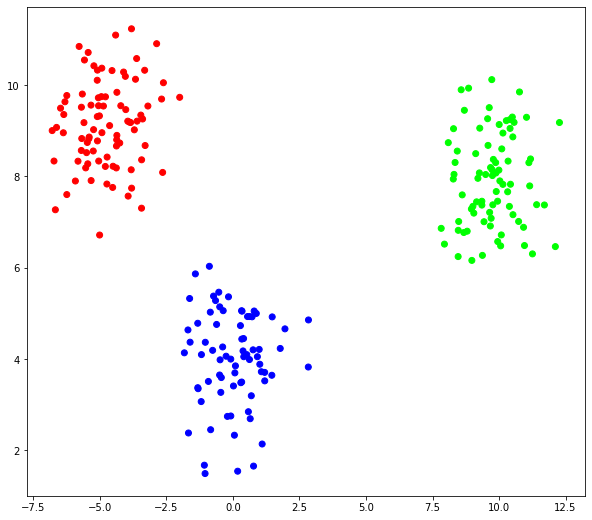

In [158]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(9)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

In [171]:
network = MLP()
criterion = CrossEntropyLoss()

network.add_layer(6, inp_shape=2, activation='relu')
network.add_layer(3)

print(network.predict(X_test))
print(network.fit(X_test, y_test, criterion))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
10.762287079886093
